In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from matplotlib import rc
import seaborn as sns
import glob 
font = {'family' : 'Helvetica','size'   : 9,'weight':  'normal'}
rc('font', **font)  # pass in the font dict as kwargs

In [3]:
"Get the folders for the aa data"
data_AA='/Users/mallu899/Documents/projects/lacI_CG_master/data/Circle-AA/'

#RBent_folder_aa=data_AA+'R_Bent/03-prod/'
RStraight_folder_aa=data_AA+'R_Straight/03-prod/'
SBent_folder_aa=data_AA+'S-Bent/2A10/'
SStraight_folder_aa=data_AA+'S-Straight/2A10/'

SBent_folder_2A10_aa=data_AA+'S-Bent/2A10/'
SBent_folder_3A3_aa=data_AA+'S-Bent/3A3/'

SStraight_folder_2A10_aa=data_AA+'S-Straight/2A10/'
SStraight_folder_3A3_aa=data_AA+'S-Straight/3A3/'


specComp_folder_aa=data_AA+'Spec_Comp/' #crystal structure

In [12]:
"Get the CG specific complexes"
FolderRspecific02A_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/R_ADNA/R_ADNA_02/'
FolderRspecific03A_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/R_ADNA/R_ADNA_03/'
FolderRspecific02B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/R_BDNA/R_BDNA_02/'
FolderRspecific03B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/R_BDNA/R_BDNA_03/'

FolderSspecific02A_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_02/'
FolderSspecific03A_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/'
FolderSspecific02B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_BDNA/S_BDNA_02/'
FolderSspecific03B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_BDNA/S_BDNA_03/'

In [13]:
"Get the CG non-specific complexes"
FolderS02B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/Ele_LowRep/S02/'
FolderS03B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/Ele_LowRep/S03/'
FolderR02B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/Ele_LowRep/R02/'
FolderR03B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/Ele_LowRep/R03/'

In [14]:
def read_dis(file):
    "Read the file and return the z coordiante (position along DNA-axis)"
    Z = []
    df = pd.read_csv(file, sep='\s+',header=None,engine='python')
    df.rename(columns={0:'Z'},inplace=True)
    return(df['Z'])
def read_energy(file,name):
    """reads the enery file and returns one column.
    name is either B-bonded, A-angle, 
    DH-electrostatics,LJ-non-bonded, R-repulsion, 
    El-protein-DNA electrostatics,
    and electristatics for protein helices:H1A,H2A...hiB."""

    df = pd.read_csv(file, sep='\s+',header=None,engine='python')
    df['total']=df[0]+df[1]+df[2]+df[3]+df[4]
        #df.rename(columns={0:'B',1:'A',2:'DH',3:'LJ',4:'R',6:'El'},inplace=True)
    df.rename(columns={0:'B',1:'A',2:'DH_all',3:'LJ',4:'R',6:'DH',12:'H1A',\
    14:'H2A',16:'H3A',18:'hiA',13:'H1B',15:'H2B',17:'H3B',19:'hiB'},inplace=True)
    return(df[name])

In [7]:
#glob.glob(FolderRspecific02A+'*Displacement.txt')

In [15]:
def filter_bound(positions,tobefiltered):
    """Get the index of the protein positioned on the target site (center is on 0 in Z direction)"""
    index_bound = positions[(-10 <= positions['Z']) & (positions['Z'] <= 10)].index
    Count_points = len(index_bound)
    "Filterout the electrostatics for those frames"
    tobefiltered_bound = tobefiltered.iloc[index_bound]
    return(tobefiltered_bound)

In [16]:
class plot_CG:
    def energy_on_target(Folder,energy):
        "Read in the data for displacemnet and energies"
        filesDis = glob.glob(Folder+'*Displacement.txt')
        filesEl = glob.glob(Folder+'el/EbyType*.dat')
        "Get the IDs of the files to compare with the right electrostatics file"
        IDsDis = [filesDis[x][-24:-20] for x in list(range(5))]
        "Check for the right ID"
        p1 = []
        p2 = []
        for i in IDsDis:
            for file_D in filesDis:
                if i in file_D:
                    p1.append(file_D)
                    
            for file_e in filesEl:
                if i in file_e:
                    p2.append(file_e)
        "Get data for the frames on the target sequence"
        data = []
        for d,l in zip(p1,p2):
            "Read the data from the files and do the analysis."
            Disdata = pd.DataFrame(read_dis(d))
            Eldata = read_energy(l,energy)
            "Check if the protein is at the target site and filter out electrostatic energy for this frames."
            data.append(filter_bound(Disdata, Eldata))
        return(data)
    def plot_occ(folder,name,salt,model):    
        "read the residues and to which extend they are formed"
        files_Con = glob.glob(folder+'*Occ.txt')
        filesDis = glob.glob(folder+'*Displacement.txt')
        print(files_Con)
        "Get the IDs of the frames to compare with the right electrostatics file"
        IDsDis = [filesDis[x][-24:-20] for x in list(range(5))]
        "Check for the right ID"
        p1 = []
        p2 = []
        for i in IDsDis:
            for file_D in filesDis:
                if i in file_D:
                    p1.append(file_D) #odered files Displacement
            for file_e in files_Con:
                if i in file_e:
                    p2.append(file_e) #ordered files Contacts
        print(p2)

        dfs=[]
        sums=[]

        for i in range(len(p1)):
            "Read the data from the files and do the analysis."
            d=p1[i]
            l=p2[i]
            Disdata = pd.read_csv(d, sep='\s+',header=None,engine='python')
            #print(Disdata)
            Disdata.rename(columns={0:'Z'},inplace=True)
            dfres = pd.read_csv(l, sep='\s+',header=0,engine='python')
            Cont_bound = filter_bound(Disdata,dfres)
            dfs.append(Cont_bound)
            sum_df=pd.DataFrame(Cont_bound.sum())/len(Cont_bound.index)
            sum_df.rename(index=dictionay_resCG,inplace=True)
            #print(sum_df)
            replica=[i+1 for x in sum_df[0]]
            complex_=[name for x in sum_df[0]]
            Salt=[salt for x in sum_df[0]]
            Model=[model for x in sum_df[0]]
            sum_df['Replica']=replica
            sum_df['Complex']=complex_
            sum_df['Salt']=Salt
            sum_df['Model']=Model
            sum_df['Residue']=sum_df.index
            sum_df.rename(columns={0:'Occupancy'},inplace=True)
            sums.append(sum_df)

        df_sums=pd.concat([x for x in sums])
        return(dfs,df_sums)

In [17]:
FolderSspecific03B_cg

'/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_BDNA/S_BDNA_03/'

In [18]:
plot_CG.energy_on_target(FolderSspecific03B_cg,'total')

[0     -1845.97
 1     -1844.53
 2     -1828.37
 3     -1837.26
 4     -1820.93
         ...   
 114   -1687.88
 115   -1681.77
 116   -1677.12
 117   -1672.38
 118   -1671.25
 Name: total, Length: 100, dtype: float64,
 0      -1853.83
 1      -1845.71
 2      -1837.44
 3      -1842.07
 4      -1827.11
          ...   
 4761   -1683.91
 4820   -1683.50
 4821   -1700.05
 4822   -1709.59
 4823   -1692.22
 Name: total, Length: 504, dtype: float64,
 0      -1849.72
 1      -1846.22
 2      -1829.63
 3      -1828.89
 4      -1826.68
          ...   
 1499   -1679.03
 1500   -1669.51
 1501   -1673.69
 1502   -1680.71
 1503   -1683.83
 Name: total, Length: 1171, dtype: float64,
 0      -1854.96
 1      -1833.94
 2      -1835.91
 3      -1825.64
 4      -1815.49
          ...   
 4995   -1658.18
 4996   -1659.01
 4997   -1672.25
 4998   -1663.88
 4999   -1666.52
 Name: total, Length: 1028, dtype: float64,
 0      -1844.85
 1      -1840.48
 2      -1822.59
 3      -1825.39
 4      -1816.45
    

In [19]:
def energy_(Folder,model,salt,energy):
    "Read in the data for displacemnet and energies"
    filesEl = glob.glob(Folder+'EbyType*.dat')
    "Get the IDs of the files to compare with the right electrostatics file"
    "Check for the right ID"
    p2=[]
    replica=[]
    for i in range(len(filesEl)):
        p2.append(read_energy(filesEl[i],energy)[10000:49999])
        replica.append([i+1 for x in p2[i]])
    pp=pd.concat([x for x in p2])
    replica_=[x for y in replica for x in y]
    print((len(pp),len(replica_)))
    df=pd.DataFrame({'energy':pp,'ind':replica_,'Complex':[model for x in pp],'Salt':[salt for x in pp],'DNA':['nonspecific' for x in pp]})
    return(df)

In [20]:
nonspec_S_cg=energy_(FolderS03B_cg,'S_',0.03,'total')

(199995, 199995)


In [21]:
S_total=nonspec_S_cg.groupby('Salt').mean()

In [22]:
nonspec_R_cg=energy_(FolderR03B_cg,'R_',0.03,'total')

(199995, 199995)


In [23]:
R_total=nonspec_R_cg.groupby('Salt').mean()

In [24]:
class plot_AA:
    def get_el(folder):
        "Get all subfolders with different replica"
        files=glob.glob(folder+'Electro/*/DH.dat')
        return(files)
    def get_DH_vs_t(folder,start,end):
        "Get all subfolders with different replica"
        dfs=[]
        el = plot_AA.get_el(folder)
        for i in el:
            df=pd.read_csv(i,sep='\s+',names=['time','DH'],skiprows=1)[start:end]
            df['DH']=df['DH']/4.184
            dfs.append(df)
        return(dfs)
    def plot_el_t(folder,start):
        rep=plot_el.get_DH_vs_t(folder,start)
        fig, ax = plt.subplots(figsize = (2.5,2))
        for i in range(len(rep)):
            plt.plot(rep[i]['time'],rep[i]['DH']/4.184,label=i+1)
        ax.tick_params(

            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True,
            right=False, left=True, labelleft=True,labelsize='small',
            width = 0.5,
            length = 3, color='k',direction ='in')
        #ax.set_ylim(-95,-5)

        plt.legend()
        plt.ylabel('DH Energy')
        plt.xlabel('Frames')

In [37]:
def plot_el_sns(folder,comp,salt,energy='DH',start=None,end=None):
    if start!=None:
        rep=plot_AA.get_DH_vs_t(folder,start,end)
        model='AA'
    else:
        rep=plot_CG.energy_on_target(folder,energy)
        model='CG'
    first=pd.DataFrame(rep[0])
    first['ind']=[1 for j in (range(len(rep[0])))]
    first['Complex']=[comp for j in (range(len(rep[0])))]
    first['Salt']=[salt for j in (range(len(rep[0])))]
    first['Model']=[model for j in (range(len(rep[0])))]
    for i in range(len(rep)-1):
        next_=pd.DataFrame(rep[i+1])
        next_['ind']=[i+2 for j in (range(len(next_)))]
        next_['Complex']=[comp for j in (range(len(next_)))]
        next_['Salt']=[salt for j in (range(len(next_)))]
        next_['Model']=[model for j in (range(len(next_)))]
        app=first.append(next_)
        first=app
    return(app)

In [26]:
def plot_el_specCG(folder,comp,salt,start=None,end=None):

    rep=plot_CG.energy_on_target(folder)
    model='specific'
    first=pd.DataFrame(rep[0])
    first['ind']=[1 for j in (range(len(rep[0])))]
    first['Complex']=[comp for j in (range(len(rep[0])))]
    first['Salt']=[salt for j in (range(len(rep[0])))]
    first['DNA']=[model for j in (range(len(rep[0])))]
    for i in range(len(rep)-1):
        next_=pd.DataFrame(rep[i+1])
        next_['ind']=[i+2 for j in (range(len(next_)))]
        next_['Complex']=[comp for j in (range(len(next_)))]
        next_['Salt']=[salt for j in (range(len(next_)))]
        next_['DNA']=[model for j in (range(len(next_)))]
        app=first.append(next_)
        first=app
    return(app)

In [17]:
#plot_el_sns(FolderRspecific02A_cg,'R:','0.02')

In [18]:
#plot_el_sns(RBent_folder_aa,'R:','0.15',start=2000,end=5000)

In [3]:
#plot_el_sns(RStraight_folder_aa,'S:','0.15',start=0,end=4000)

In [27]:
def normalize_comp(folder,name,salt,avg_non_spec):
    df=plot_el_sns(folder,name,salt,'total')
    df['total_norm']=df['total']-int(avg_non_spec['energy'])
    return(df)

In [38]:
#Electrostatics
#all_comp=[plot_el_sns(FolderSspecific03B_cg,'S_','0.03'),plot_el_sns(FolderRspecific03B_cg,'R_','0.03'),plot_el_sns(FolderSspecific03A_cg,'S:','0.03'),plot_el_sns(FolderRspecific03A_cg,'R:','0.03'),plot_el_sns(SStraight_folder_3A3_aa,'S_','0.15',start=0,end=4000),plot_el_sns(SStraight_folder_2A10_aa,'S_','0.15',start=0,end=4000),plot_el_sns(RStraight_folder_aa,'R_','0.15',start=0,end=4000),plot_el_sns(SBent_folder_2A10_aa,'S:','0.15',start=0,end=4000),plot_el_sns(SBent_folder_3A3_aa,'S:','0.15',start=0,end=4000),plot_el_sns(specComp_folder_aa,'R:','0.15',start=0,end=4000)]
all_comp_CG_DH=[plot_el_sns(FolderSspecific03B_cg,'S_','0.03'),plot_el_sns(FolderRspecific03B_cg,'R_','0.03'),plot_el_sns(FolderSspecific03A_cg,'S:','0.03'),plot_el_sns(FolderRspecific03A_cg,'R:','0.03')]
#all_comp_AA=[plot_el_sns(SStraight_folder_3A3_aa,'S_','0.15',start=0,end=4000),plot_el_sns(SStraight_folder_2A10_aa,'S_','0.15',start=0,end=4000),plot_el_sns(RStraight_folder_aa,'R_','0.15',start=0,end=4000),plot_el_sns(specComp_folder_aa,'R:','0.15',start=0,end=4000)]

#all_comp=[plot_el_sns(FolderSspecific03B_cg,'S_','0.03'),plot_el_sns(FolderRspecific03B_cg,'R_','0.03'),plot_el_sns(FolderSspecific03A_cg,'S:','0.03'),plot_el_sns(FolderRspecific03A_cg,'R:','0.03')]
#all_comp=[plot_el_sns(FolderSspecific03B_cg,'S_','0.03')]

#allc_join=all_comp[0].append(all_comp[1]).append(all_comp[2]).append(all_comp[3]).append(all_comp[4])#.append(all_comp[5])#.append(all_comp[6]).append(all_comp[7]).append(all_comp[8])#.append(all_comp[9])#.append(all_comp[9])
#all_comp02=[plot_el_sns(FolderSspecific02B,'S_','0.02'),plot_el_sns(FolderRspecific02B,'R_','0.02'),plot_el_sns(FolderSspecific02A,'S:','0.02'),plot_el_sns(FolderRspecific02A,'R:','0.02')]
#allc_join02=all_comp02[0].append(all_comp02[1]).append(all_comp02[2]).append(all_comp02[3])
#allc_join_s=all_comp[0].append(all_comp[1]).append(all_comp[2]).append(all_comp[3]).append(all_comp[4]).append(all_comp[5]).append(all_comp[6]).append(all_comp[7])


In [41]:
#data_AA=pd.concat([x for x in all_comp_AA])
data_CG_DH=pd.concat([x for x in all_comp_CG_DH])
data_CG_DH.replace({'S_':'$search$_','R_':'$recog.$_',\
                          'S:':'$search$:','R:':'$recog.$:',},inplace=True)


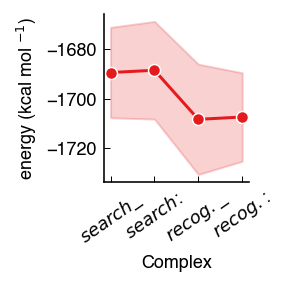

In [82]:
all_comp_CG_total=[normalize_comp(FolderSspecific03B_cg,'S_','0.03',S_total),normalize_comp(FolderSspecific03A_cg,'S:','0.03',S_total),normalize_comp(FolderRspecific03B_cg,'R_','0.03',R_total),normalize_comp(FolderRspecific03A_cg,'R:','0.03',R_total)]
data_CG_total=pd.concat([x for x in all_comp_CG_total])
data_CG_total.replace({'S_':'$search$_','R_':'$recog.$_',\
                          'S:':'$search$:','R:':'$recog.$:',},inplace=True)
fig, ax = plt.subplots(figsize = (2.1,2.1))
#sns.boxplot(y='DH',data=allc_join,x='Complex',width=0.8,linewidth=0.9,hue='Model',palette="Set1",medianprops={'color':'cyan'})
#sns.plot(y='DH',data=allc_join,x='Complex',palette="Accent_r",hue='Model',dodge=0.1,linewidth=0.2,alpha=0.6,size=1.8)
#sns.stripplot(y='DH',data=allc_join,x='Complex',hue='Model',palette="Set1",dodge=0.1,linewidth=0.7,jitter=0.0005,alpha=0.5)
#sns.violinplot(y='total',data=data_CG_total,x='Complex',hue='Model',palette="Set1",scale='area')
sns.lineplot(y='total',data=data_CG_total,x='Complex',hue='Model',palette="Set1", style="Model",
    markers=True,err_style="band",ci="sd")

#sns.barplot(y='DH',data=allc_join,x='Complex',linewidth=0.9,hue='Model',palette="Set1",orient="v", capsize=.2)

ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
plt.ylabel('energy (kcal mol $^{-1}$)')
plt.xticks(rotation=35)
plt.legend([],[], frameon=False)
sns.despine()
plt.tight_layout()
#plt.ylim(-38,1)
plt.savefig('/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/VersionX/CG_total.png',dpi=300,bbox_inches='tight', transparent=True)

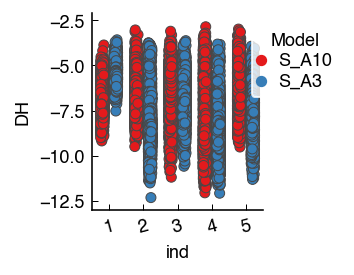

In [27]:
S_Bent_complexes_A3A10=[plot_el_sns(SBent_folder_2A10_aa,'S_A10','0.15',start=0,end=4000),plot_el_sns(SBent_folder_3A3_aa,'S_A3','0.15',start=0,end=4000)]
S_Bent_complexes_A3A10_join=S_Bent_complexes_A3A10[0].append(S_Bent_complexes_A3A10[1])
fig, ax = plt.subplots(figsize = (3,2))
g=sns.stripplot(x='ind',y='DH',hue='Complex',data=S_Bent_complexes_A3A10_join,linewidth=0.5,palette='Set1', dodge=True)
ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
#plt.ylim([-0.1,1.1])
plt.xticks(rotation=15)
sns.despine()
#plt.legend([],[], frameon=False)
plt.legend(loc='upper right',title_fontsize=9,title='Model',edgecolor='white',
             markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3,bbox_to_anchor=(1.5, 0.99))
plt.tight_layout()

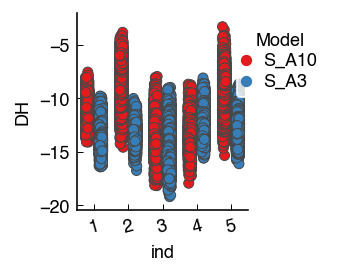

In [28]:
S_Straight_complexes_A3A10=[plot_el_sns(SStraight_folder_2A10_aa,'S_A10','0.15',start=0,end=4000),plot_el_sns(SStraight_folder_3A3_aa,'S_A3','0.15',start=0,end=4000)]
S_Straight_complexes_A3A10_join=S_Straight_complexes_A3A10[0].append(S_Straight_complexes_A3A10[1])
#look at the three different S_Straight
fig, ax = plt.subplots(figsize = (3,2))
g=sns.stripplot(x='ind',y='DH',hue='Complex',data=S_Straight_complexes_A3A10_join,linewidth=0.5,palette='Set1', dodge=True)
ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
#plt.ylim([-0.1,1.1])
plt.xticks(rotation=15)
sns.despine()
#plt.legend([],[], frameon=False)
plt.legend(loc='upper right',title_fontsize=9,title='Model',edgecolor='white',
             markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3,bbox_to_anchor=(1.5, 0.99))
plt.tight_layout()

In [51]:
data_nonspe_spec=pd.concat([nonspec_S_cg.sample(n=5116, random_state=1),nonspec_R_cg.sample(n=5116, random_state=1),plot_el_specCG(FolderSspecific03B_cg,'S_','0.03'),plot_el_specCG(FolderRspecific03B_cg,'R_','0.03')])

nonspec_R/S_cg 199995 rows

In [31]:
nonspec_S_cg.sample(n=5116, random_state=1)

,DH,ind,Complex,Salt,DNA
26677,-15.72,4,S_,0.03,nonspecific
30855,-11.77,5,S_,0.03,nonspecific
18112,-13.08,5,S_,0.03,nonspecific
41924,-12.43,2,S_,0.03,nonspecific
15420,-14.54,1,S_,0.03,nonspecific
...,...,...,...,...,...
20489,-14.87,5,S_,0.03,nonspecific
30026,-14.99,3,S_,0.03,nonspecific
29837,-14.02,1,S_,0.03,nonspecific
19116,-15.39,5,S_,0.03,nonspecific


In [50]:
tt=plot_el_sns(FolderSspecific03B_cg,'S_','0.03') #6589

In [52]:
tt=plot_el_sns(FolderRspecific03B_cg,'S_','0.03') #5116

In [53]:
tt

,DH,ind,Complex,Salt,Model
0,-3.01,1,S_,0.03,CG
1,-3.46,1,S_,0.03,CG
2,-3.16,1,S_,0.03,CG
4541,-11.73,1,S_,0.03,CG
4542,-11.98,1,S_,0.03,CG
...,...,...,...,...,...
525,-2.56,5,S_,0.03,CG
526,-3.04,5,S_,0.03,CG
527,-3.29,5,S_,0.03,CG
528,-4.00,5,S_,0.03,CG


In [57]:
sns.color_palette("Set1")[:2][::-1]

[(0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

In [68]:
data_nonspe_spec=pd.concat([nonspec_S_cg.sample(n=5116, random_state=1),nonspec_R_cg.sample(n=5116, random_state=1),plot_el_specCG(FolderSspecific03B_cg,'S_','0.03'),plot_el_specCG(FolderRspecific03B_cg,'R_','0.03')])
data_nonspe_spec.replace({'S_':'$search$','R_':'$recognition$',\
                          'nonspecific':'non-operator','specific':'operator'},inplace=True)

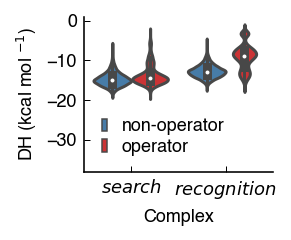

In [70]:
fig, ax=plt.subplots(figsize = (2.1,1.8))
#sns.boxplot(y='DH',data=data_nonspe_spec,x='Complex',width=0.6,linewidth=0.9,hue='Model',palette="Set2",medianprops={'color':'cyan'})
#sns.stripplot(y='DH',data=data_nonspe_spec,x='Complex',palette="Accent_r",hue='Model',dodge=0.1,linewidth=0.5,alpha=0.6)
sns.violinplot(y='DH',data=data_nonspe_spec,x='Complex',hue='DNA',palette=sns.color_palette("Set1")[:2][::-1],\
               scale='area',split=False)
#sns.swarmplot(y='DH',data=data_nonspe_spec,x='Complex',hue='Model',palette="Accent_r",alpha=0.6)
ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
plt.ylabel('DH (kcal mol $^{-1}$)')
plt.xticks()
sns.despine()
plt.legend(loc='upper left',title_fontsize=9,title=False,edgecolor='white',
              markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3,bbox_to_anchor=(0.01, 0.45))
#plt.legend([],[], frameon=False)
plt.tight_layout()
plt.ylim(-38,1)
plt.savefig('/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/VersionX/Nonspec_spec_DH.png',dpi=300,bbox_inches='tight', transparent=True)

In [40]:
data_CG_DH

,total,ind,Complex,Salt,Model
0,-1845.97,1,$search$_,0.03,CG
1,-1844.53,1,$search$_,0.03,CG
2,-1828.37,1,$search$_,0.03,CG
3,-1837.26,1,$search$_,0.03,CG
4,-1820.93,1,$search$_,0.03,CG
...,...,...,...,...,...
4973,-1703.76,5,$recog.$:,0.03,CG
4974,-1713.60,5,$recog.$:,0.03,CG
4975,-1715.88,5,$recog.$:,0.03,CG
4976,-1705.79,5,$recog.$:,0.03,CG


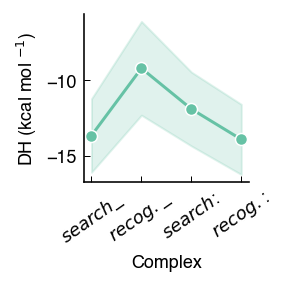

In [61]:
fig, ax = plt.subplots(figsize = (2.1,2.1))
#sns.boxplot(y='DH',data=allc_join,x='Complex',width=0.8,linewidth=0.9,hue='Model',palette="Set1",medianprops={'color':'cyan'})
#sns.plot(y='DH',data=allc_join,x='Complex',palette="Accent_r",hue='Model',dodge=0.1,linewidth=0.2,alpha=0.6,size=1.8)
#sns.stripplot(y='DH',data=allc_join,x='Complex',hue='Model',palette="Set1",dodge=0.1,linewidth=0.7,jitter=0.0005,alpha=0.5)
#sns.violinplot(y='DH',data=data_CG_DH,x='Complex',hue='Model',palette="Set1",scale='area')
sns.lineplot(y='DH',data=data_CG_DH,x='Complex',hue='Model',palette="Set2", style="Model",
    markers=True,err_style="band",ci="sd")

#sns.barplot(y='DH',data=allc_join,x='Complex',linewidth=0.9,hue='Model',palette="Set1",orient="v", capsize=.2)

ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
plt.ylabel('DH (kcal mol $^{-1}$)')
plt.xticks(rotation=35)
plt.legend([],[], frameon=False)
sns.despine()
plt.tight_layout()
#plt.ylim(-38,1)
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/VersionX/CG_DH.png',dpi=300,bbox_inches='tight', transparent=True)

In [43]:
H2_p=['Tyr17','Thr19','Arg22','Asn25','Tyr17.1','Thr19.1','Arg22.1','Asn25.1']
H2=['Tyr17','Thr19','Arg22','Asn25','Tyr17','Thr19','Arg22','Asn25']
spec_p=['Tyr17','Arg22','Tyr17.1','Arg22.1']
spec=['Tyr17','Arg22','Tyr17','Arg22']
hi_p=['ARG_50','LYS_58','ARG_385','LYS_393']
hi=['Arg51','Lys59','Arg51','Lys59']
all_p=['Leu6','Ser16','Tyr17','Thr19','Arg22','Asn25','Ser31','Thr34','Tyr47','Asn50','Gln54','Leu6.1','Ser16.1'
         ,'Tyr17.1','Thr19.1','Arg22.1','Asn25.1','Ser31.1','Thr34.1','Tyr47.1','Asn50.1','Gln54.1']
all_res=['Leu6','Ser16','Tyr17','Thr19','Arg22','Asn25','Ser31','Thr34','Tyr47','Asn50','Gln54','Leu6','Ser16'
         ,'Tyr17','Thr19','Arg22','Asn25','Ser31','Thr34','Tyr47','Asn50','Gln54']
H2_aa=['TYR_16','THR_18','ARG_21','ASN_24','TYR_351','THR_353','ARG_356','ASN_359']
spec_aa=['TYR_16','ARG_21','TYR_351','ARG_356']
hi_aa=['ARG_50','LYS_58','ARG_385','LYS_393']
Allr_aa=['LEU_5','SER_15','TYR_16','THR_18','ARG_21','ASN_24','SER_30','THR_33','TYR_46','ASN_49','GLN_53'
     ,'LEU_340','SER_350','TYR_351','THR_353','ARG_356','ASN_359','SER_365','THR_368','TYR_381','ASN_384','GLN_388']

In [44]:
dictionay_resCG=dict(zip(all_p,all_res))
dictionay_resAA=dict(zip(Allr_aa,all_res))

In [45]:
def subset(data,subset):    
    subset_df=data[data.index.isin(subset)]
    return(subset_df)

In [46]:
tt_SA=plot_CG.plot_occ(FolderSspecific03A_cg,'S:','0.03','CG')[1]
tt_SB=plot_CG.plot_occ(FolderSspecific03B_cg,'S_','0.03','CG')[1]
tt_RA=plot_CG.plot_occ(FolderRspecific03A_cg,'R:','0.03','CG')[1]
tt_RB=plot_CG.plot_occ(FolderRspecific03B_cg,'R_','0.03','CG')[1]

['/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/Traj_S-model1_ADNA_target_0.4_18419.datOcc.txt', '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/Traj_S-model1_ADNA_target_0.4_12944.datOcc.txt', '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/Traj_S-model1_ADNA_target_0.4_33546.datOcc.txt', '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/Traj_S-model1_ADNA_target_0.4_8735.datOcc.txt', '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/Traj_S-model1_ADNA_target_0.4_45818.datOcc.txt']
['/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/Traj_S-model1_ADNA_target_0.4_45818.datOcc.txt', '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/Traj_S-model1_ADNA_target_0.4_12944.datOcc.txt', '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/Traj_S-m

In [50]:
all_p

['Leu6',
 'Ser16',
 'Tyr17',
 'Thr19',
 'Arg22',
 'Asn25',
 'Ser31',
 'Thr34',
 'Tyr47',
 'Asn50',
 'Gln54',
 'Leu6.1',
 'Ser16.1',
 'Tyr17.1',
 'Thr19.1',
 'Arg22.1',
 'Asn25.1',
 'Ser31.1',
 'Thr34.1',
 'Tyr47.1',
 'Asn50.1',
 'Gln54.1']

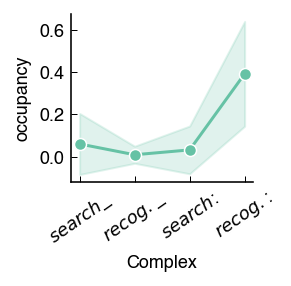

In [62]:
tt=pd.concat([tt_SB,tt_RB,tt_SA,tt_RA])
tt.replace({'S_':'$search$_','S:':'$search$:','R_':'$recog.$_','R:':'$recog.$:'},inplace=True)
fig, ax = plt.subplots(figsize = (2.1,2.1))
#g=sns.boxplot(x='Complex',y='Occupancy',hue='Model',data=subset(tt,all_p),width=0.7,linewidth=0.7,palette='Set1',medianprops={'color':'cyan'})
#sns.stripplot(x='Complex',y='Occupancy',hue='Model',data=subset(tt,all_p),palette="Set1",dodge=0.1,linewidth=0.7,alpha=0.3)
#sns.violinplot(x='Complex',y='Occupancy',data=subset(tt,all_p),palette=['grey','white'],scale='area')
sns.lineplot(x='Complex',y='Occupancy',hue='Model',data=subset(tt,all_p),palette="Set2", style="Model",
    markers=True,err_style="band",ci="sd")
#,scale='area'
ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
#plt.ylim([-0.4,1.8])
plt.xticks(rotation=35)
sns.despine()
plt.legend([],[], frameon=False)
#plt.title('specific contacts')
plt.ylabel('occupancy')
plt.legend([],[], frameon=False)
#plt.legend(loc='upper left',title_fontsize=9,title='Model',edgecolor='white',
#              markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3,bbox_to_anchor=(1.12, 0.5))
plt.tight_layout()
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/VersionX/CG_Con.png',dpi=300,bbox_inches='tight', transparent=True)

NameError: name 'tt' is not defined

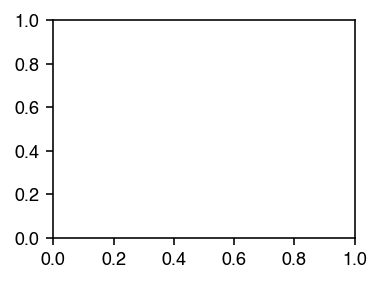

In [47]:
fig, ax = plt.subplots(figsize = (2.7,2))
sns.boxplot(x='Complex',y='Occupancy',data=subset(tt,['Tyr17','Arg22']),width=0.7,linewidth=1)
ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
plt.ylim([-0.1,1.1])
plt.xticks(rotation=15)
plt.tight_layout()

In [56]:
 class plot_hb_aa:
    def Replica(folder,name):
        files=glob.glob(folder+'hbonds/'+name)
        return(files)
    def get_hbonds_count(file):
        "Get all subfolders with different replica"
        df = pd.read_csv(file,sep='\s+',names=['Frame','count'],skiprows=1)
        return(df)
    def get_hbonds_avg(file):
        "Get all subfolders with different replica"
        df = pd.read_csv(file,sep='\s+')
        return(df)
    def count(folder):
        files_acc=plot_hb_aa.Replica(folder,'hbond_count_acc*')
        files_don=plot_hb_aa.Replica(folder,'hbond_count_don*')
        df_com=[]
        for i,j in zip(files_acc,files_don):
            df_acc=plot_hb_aa.get_hbonds_count(i)
            df_don=plot_hb_aa.get_hbonds_count(j)
            df=df_don+df_acc
            df_com.append(df)
        return(df_com)
    def avg(folder):
        files_acc=plot_hb_aa.Replica(folder,'hbavg_DNA_prot_acc*')
        files_don=plot_hb_aa.Replica(folder,'hbavg_DNA_prot_don*')
        dfs_acc,dfs_don=[],[]
        for i,j in zip(files_acc,files_don):
            dfs_acc.append(plot_hb_aa.get_hbonds_avg(i))
            dfs_don.append(plot_hb_aa.get_hbonds_avg(j))
        return(dfs_acc,dfs_don)
    def groupby_res_Frac_max_donor(residue):
        df=pd.DataFrame(residue)
        df['Donor']=df['Donor'].map(lambda x: x.split('@')[0])
        Frac_max=df.groupby(['Donor'])['Frac'].max()
        return(Frac_max)
def plot_count(folder):
    dfs=plot_hb_aa.count(folder)
    for i in range(len(dfs)):
        dfs[i]['Rep']=[i+1 for j in range(len(dfs[i]))]
    dfs_comb=pd.concat([dfs[0],dfs[1],dfs[2]])    
    sns.lineplot(data=dfs_comb,x='Frame',y='count',hue='Rep')

In [58]:
def get_hb_bind(df_don):    

    "Protein is the donor"
    tt=df_don
    tt.drop_duplicates(inplace=True)
    tt.drop(['DonorH'], axis=1,inplace=True)
    
    outLEU_bb=[]
    outSER_bb=[] #O and N (bb)
    outTYR_baseEdge=[]
    outTHR_bb=[]
    outARG_baseEdge=[]
    outASN_bb=[] #side chain to bb
    outTYR_bb=[]
    outASN_bb_bb=[] #bb to bb
    outGLN_bb=[]
    
    for x in range(len(tt)): #iterate hbonds
        if ('LEU' in tt.iloc[x]['Donor']) and ('OP' in tt.iloc[x]['#Acceptor']):
            outLEU_bb.append(tt.iloc[x]) #only leusine bb to DNA bb
        if ('SER' in tt.iloc[x]['Donor']) and ('OP' in tt.iloc[x]['#Acceptor']):
            outSER_bb.append(tt.iloc[x]) #only serine bb or side chain to DNA bb
        #if ('ARG' in tt.iloc[x]['Donor']) and ('OP' not in tt.iloc[x]['#Acceptor']):
        #    outARG_baseEdge.append(tt.iloc[x]) #only arginine side chain to base edge
        #if ('TYR' in tt.iloc[x]['Donor']) and ('OP' not in tt.iloc[x]['#Acceptor']):
        #    outTYR_baseEdge.append(tt.iloc[x]) #only tyrosine side chain to base edge
        if ('ARG' in tt.iloc[x]['Donor']):
            if any(y in tt.iloc[x]['#Acceptor'] for y in ['O2','O4','O6','N2','N3','N4','N6','N7','C4','C5','C6','C7','C2']):
                outARG_baseEdge.append(tt.iloc[x]) #only arginine side chain to base edge
        if ('TYR' in tt.iloc[x]['Donor']):
            if any(y in tt.iloc[x]['#Acceptor'] for y in ['O2','O4','O6','N2','N3','N4','N6','N7','C4','C5','C6','C7','C2']):
                outTYR_baseEdge.append(tt.iloc[x]) #only tyrosine side chain to base edge
        if ('ASN' in tt.iloc[x]['Donor']) and ('OP' in tt.iloc[x]['#Acceptor']):
            outASN_bb.append(tt.iloc[x]) #only asparagine side chain to DNA bb
        if ('THR' in tt.iloc[x]['Donor']) and ('OP' in tt.iloc[x]['#Acceptor']):
            outTHR_bb.append(tt.iloc[x]) #only threonine side chain to DNA bb   
        if ('TYR_46' in tt.iloc[x]['Donor']) and ('OP' in tt.iloc[x]['#Acceptor']):
            outTYR_bb.append(tt.iloc[x]) #only tyrosine side chain to DNA bb
        if ('TYR_381' in tt.iloc[x]['Donor']) and ('OP' in tt.iloc[x]['#Acceptor']):
            outTYR_bb.append(tt.iloc[x]) #only tyrosine side chain to DNA bb
        if ('GLN' in tt.iloc[x]['Donor']) and ('OP' in tt.iloc[x]['#Acceptor']):
            outGLN_bb.append(tt.iloc[x]) #only glutamine side chain to DNA bb
    #return(outTYR_baseEdge)     
    residue_list=[]
    list_list=[outLEU_bb,outSER_bb,outTYR_baseEdge,outTHR_bb,outARG_baseEdge,outASN_bb,outTYR_bb,outGLN_bb]    
    for j in list_list:
        if j==[]:
            print('Empty!')
            "you need to fill in 0 for for Frac in case you don't have a measurement"
        else:
            res=plot_hb_aa.groupby_res_Frac_max_donor(j)#groupby residue, get the fractions and take the max
            #print(res)
            residue_list.append(res)

    return([pd.DataFrame(x) for x in residue_list])

In [59]:
def All_avg_hb(folder,name,salt,model):
    Replica_Fracs=[]
    Avg_acc, Avg_don=plot_hb_aa.avg(folder)
    for i in range(len(Avg_don)):#iterate replica
        residues=[]
        Replica_Frac=get_hb_bind(Avg_don[i])
        for j in Replica_Frac: #iterate residues
            j['Replica']=[i+1 for x in j.index]
            j['Complex']=[name for x in j.index]
            j['Salt']=[salt for x in j.index]
            j['Model']=[model for x in j.index]
            j.reset_index(level=0, inplace=True)
           # j.replace(dictionay_resAA, inplace=True)
            j.rename(columns={'Donor':'Residue','Frac':'Occupancy'},inplace=True)
            j=j[['Occupancy','Replica','Complex','Salt','Model','Residue']]
            j.index=j['Residue']
            residues.append(j)
        Replica_Fracs.append(pd.concat([x for x in residues]))
    dfs=pd.concat([y for y in Replica_Fracs])
    return(dfs)
def subset_aa(data,region):
    df_sub=data[data['Residue'].isin(region)]
    name=data['Complex'].iloc[0]
    salt=data['Salt'].iloc[0]
    model=data['Model'].iloc[0]
    "Check how many replica you have"
    Replica=np.unique(data['Replica'])
    print(Replica)
    add_dfs=[]
    "Fill in 0 for each missing datapoint"
    for j in Replica: #iterate over the replica you have
        Add=[]
        Rep=df_sub[df_sub['Replica']==j] #get the data for one replica
        for i in region:
            "Check if the value is in the data"
            if i in [x for x in Rep.index]:
                print('OK!')
            else:
                Add=i
                zeros=0.0000
                Name=name
                replica=j
                add_dfs.append(pd.DataFrame(np.reshape([zeros,replica,Name,salt,model,Add],(1,6)),index=[Add],columns=['Occupancy','Replica','Complex','Salt','Model','Residue']))

    print(len(add_dfs))
    if len(add_dfs)==0:
        concat=df_sub
    elif len(add_dfs)==1:
        add_df=add_dfs[0].astype({"Occupancy": float})
        concat=pd.concat([df_sub,add_df])
    else:
        add_df=pd.concat([x.astype({"Occupancy": float}) for x in add_dfs])
        concat=pd.concat([df_sub,add_df])
    concat['Residue'].replace(dictionay_resAA, inplace=True)
    concat.index=list(concat['Residue'])
    
    return(concat)

In [60]:
spec_aa

['TYR_16', 'ARG_21', 'TYR_351', 'ARG_356']

In [63]:
"All-atom"
Straight_S_A10=subset_aa(All_avg_hb(SStraight_folder_2A10_aa,'S_',0.03,'AA'),Allr_aa)
Straight_S_A3=subset_aa(All_avg_hb(SStraight_folder_3A3_aa,'S_',0.03,'AA'),Allr_aa)
###Straight_S_35=subset_aa(All_avg_hb(SStraight_folder_3A3,'S_35',0.03,'AA'),Allr_aa)
Straight_R=subset_aa(All_avg_hb(RStraight_folder_aa,'R_',0.03,'AA'),Allr_aa)

#Bent_S_A10=subset_aa(All_avg_hb(SBent_folder_2A10_aa,'S:',0.03,'AA'),Allr_aa)
#Bent_S_A3=subset_aa(All_avg_hb(SBent_folder_3A3_aa,'S:',0.03,'AA'),Allr_aa)
#Bent_R=subset_aa(All_avg_hb(RBent_folder_aa,'R:',0.03,'AA'),Allr_aa)

Empty!
Empty!
Empty!
[1 2 3 4 5]
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
56
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
[1 2 3 4 5]
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
58
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
Empty!
[1 2 3 4 5]
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
54


In [64]:
Specific_R=subset_aa(All_avg_hb(specComp_folder_aa,'R:',0.03,'AA'),Allr_aa)

[1 2 3 4 5]
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
3


In [54]:
#Straight_S_hi=subset_aa(All_avg_hb(SStraight_folder,'S_',0.03,'AA'),hi_aa)
#Straight_R_hi=subset_aa(All_avg_hb(RStraight_folder,'R_',0.03,'AA'),hi_aa)
#Specific_R_hi=subset_aa(All_avg_hb(specComp_folder,'R::',0.03,'AA'),hi_aa)
#Bent_S_hi=subset_aa(All_avg_hb(SBent_folder,'S:',0.03,'AA'),hi_aa)
#Bent_R_hi=subset_aa(All_avg_hb(RBent_folder,'R:',0.03,'AA'),hi_aa)

In [73]:
Straight_S_22_210=subset_aa(All_avg_hb(SStraight_folder_2A10_aa,'S_',0.03,'AA'),['ARG_21','ARG_356'])
Straight_S_22_3A3=subset_aa(All_avg_hb(SStraight_folder_3A3_aa,'S_',0.03,'AA'),['ARG_21','ARG_356'])
Straight_R_22=subset_aa(All_avg_hb(RStraight_folder_aa,'R_',0.03,'AA'),['ARG_21','ARG_356'])
Specific_R_22=subset_aa(All_avg_hb(specComp_folder_aa,'R:',0.03,'AA'),['ARG_21','ARG_356'])
#Bent_S_22_210=subset_aa(All_avg_hb(SBent_folder_2A10_aa,'S:',0.03,'AA'),['ARG_21','ARG_356'])
#Bent_S_22_3A3=subset_aa(All_avg_hb(SBent_folder_3A3_aa,'S:',0.03,'AA'),['ARG_21','ARG_356'])
#Bent_R_22=subset_aa(All_avg_hb(RBent_folder,'R:',0.03,'AA'),['ARG_21','ARG_356'])

NameError: name 'subset_aa' is not defined

In [ ]:
H2_aa=['TYR_16','THR_18','ARG_21','ASN_24','TYR_351','THR_353','ARG_356','ASN_359']
['ARG_21','ARG_356']

In [67]:
tt22=pd.concat([Straight_S_22_210,Straight_S_22_3A3,Straight_R_22,Specific_R_22])#,,Bent_R

In [138]:
tt_AA=tt[tt['Model']=='AA']

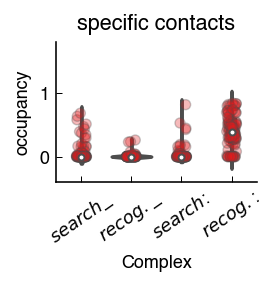

In [49]:
tt=pd.concat([tt_SB,tt_RB,tt_SA,tt_RA])#,,Bent_R
tt.replace({'S_':'$search$_','S:':'$search$:','R_':'$recog.$_','R:':'$recog.$:'},inplace=True)
fig, ax = plt.subplots(figsize = (2.1,2.1))
#g=sns.boxplot(x='Complex',y='Occupancy',hue='Model',data=subset(tt,all_p),width=0.7,linewidth=0.7,palette='Set1',medianprops={'color':'cyan'})
sns.stripplot(x='Complex',y='Occupancy',hue='Model',data=subset(tt,all_p),palette="Set1",dodge=0.1,linewidth=0.7,alpha=0.3)
b=sns.violinplot(x='Complex',y='Occupancy',data=subset(tt,all_p),palette=['grey','white'],scale='area')

#,scale='area'
ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
plt.ylim([-0.4,1.8])
plt.xticks(rotation=35)
sns.despine()
plt.legend([],[], frameon=False)
plt.title('specific contacts')
plt.ylabel('occupancy')
plt.legend([],[], frameon=False)
#plt.legend(loc='upper left',title_fontsize=9,title='Model',edgecolor='white',
#              markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3,bbox_to_anchor=(1.12, 0.5))
plt.tight_layout()
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/VersionX/CG_Con.png',dpi=300,bbox_inches='tight', transparent=True)
#plt.savefig('/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/VersionX/CGvsAA_Con_A3.png',dpi=800,bbox_inches='tight', transparent=True)

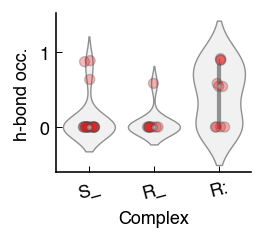

In [69]:
fig, ax = plt.subplots(figsize = (2.1,1.8))
#g=sns.boxplot(x='Complex',y='Occupancy',hue='Model',data=subset(tt,all_p),width=0.7,linewidth=0.7,palette='Set1',medianprops={'color':'cyan'})
sns.stripplot(x='Complex',y='Occupancy',hue='Model',data=tt22,palette="Set1",dodge=0.1,linewidth=0.7,alpha=0.3)
b=sns.violinplot(x='Complex',y='Occupancy',hue='Model',data=tt22,color='0.9',linewidth=0.7)

#,scale='area'
ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
#plt.ylim([-0.4,1.8])
plt.xticks(rotation=15)
sns.despine()
plt.legend([],[], frameon=False)
plt.ylabel('h-bond occ.')
#plt.legend(loc='upper left',title_fontsize=9,title='Model',edgecolor='white',
#              markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3,bbox_to_anchor=(1.12, 0.5))
plt.tight_layout()
plt.savefig('/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/VersionX/AA_Arg22.png',dpi=300,bbox_inches='tight', transparent=True)

In [80]:
subset_AA=subset(tt_AA,['Tyr17','Arg22'])

In [81]:
subset_AA

,Occupancy,Replica,Complex,Salt,Model,Residue
Tyr17,0.0044,1,S_,0.03,AA,Tyr17
Arg22,0.0036,1,S_,0.03,AA,Arg22
Tyr17,0.3050,2,S_,0.03,AA,Tyr17
Arg22,0.6364,2,S_,0.03,AA,Arg22
Tyr17,0.0074,3,S_,0.03,AA,Tyr17
...,...,...,...,...,...,...
Tyr17,0.9371,5,R::,0.03,AA,Tyr17
Arg22,0.8941,5,R::,0.03,AA,Arg22
Arg22,0.0000,1,R::,0.03,AA,Arg22
Arg22,0.0000,4,R::,0.03,AA,Arg22


In [82]:
subset_AA_0=subset_AA[subset_AA['Occupancy']!=0.0000]

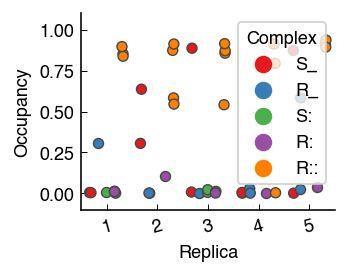

In [83]:
fig, ax = plt.subplots(figsize = (2.5,2))
g=sns.stripplot(x='Replica',y='Occupancy',hue='Complex',data=subset_AA_0,linewidth=0.7,palette='Set1', dodge=True)
ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
plt.ylim([-0.1,1.1])
plt.xticks(rotation=15)
sns.despine()
#plt.legend([],[], frameon=False)
#plt.legend(loc='upper right',title_fontsize=9,title='Model',edgecolor='white',
 #             markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3,bbox_to_anchor=(1.12, 0.5))
plt.tight_layout()


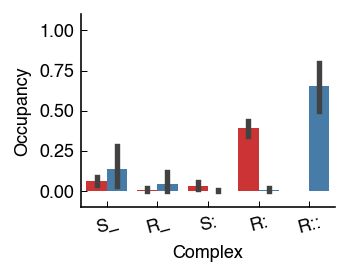

In [157]:
fig, ax = plt.subplots(figsize = (2.1,1.8))
g=sns.barplot(x='Complex',y='Occupancy',hue='Model',data=subset(tt,all_p),linewidth=0.7,palette='Set1', dodge=True)
ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
plt.ylim([-0.1,1.1])
plt.xticks(rotation=15)
sns.despine()
plt.legend([],[], frameon=False)
#plt.legend(loc='upper right',title_fontsize=9,title='Model',edgecolor='white',
             # markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3,bbox_to_anchor=(1.12, 0.5))
plt.tight_layout()
plt.savefig('/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/VersionX/CGvsAA_Con_st.png',dpi=800,bbox_inches='tight', transparent=True)

Plot bot, all specific residues and just the two 'important' ones!